<H1> Intro to Pandas

Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with
“relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing
practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and
flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this
goal.
This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the
[Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html).


<H3>0. Setup 

Import the libraries.



In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

You're ready to use Pandas!

<H3> 1. Basics: "Series" and "DataFrame"

(Find more in the Data Structure Intro section)

The two primary data structures of pandas, Series (1-dimensional) and DataFrame (2-dimensional), handle the vast
majority of typical use cases in finance, statistics, social science, and many areas of engineering. For R users,
DataFrame provides everything that R’s data.frame provides and much more. Pandas is built on top of NumPy and is
intended to integrate well within a scientific computing environment with many other 3rd party libraries.

<H2> Series </H2>
Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers,
Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is
to call:


s = Series(data, index=index)

Creating a Series by passing a list of values, letting pandas create a default integer index

In [54]:
s = pd.Series([1,3,5,np.nan,6,8])

In [55]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

<H2> DataFrame </H2>
DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like
an Excel spreadsheet or SQL table, or a Python dict (dictionary) of Series objects. It is generally the most commonly
used pandas object. Like Series, DataFrame accepts many different kinds of input:

*   Dict of 1D ndarrays, lists, dicts, or Series
*   2-D numpy.ndarray
*   Structured or record ndarray
*   A Series
*   Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass
an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict
of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [56]:
dates = pd.date_range('20130101', periods=6)

In [57]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [58]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [59]:
df

,A,B,C,D
2013-01-01,-0.005848,1.129725,0.384478,-0.630898
2013-01-02,1.249908,1.330852,1.739553,-0.772477
2013-01-03,0.461417,-0.238513,-0.383972,0.595008
2013-01-04,1.266012,-0.519241,-1.057952,0.944983
2013-01-05,-0.783996,0.236192,-0.421891,-0.278389
2013-01-06,-0.256843,0.829321,1.740548,-0.291023


Creating a DataFrame by passing a dictionary of objects that can be converted to series-like.

In [60]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })

In [61]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific dtypes

In [62]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

<H3>2. Viewing Data

(Find more in the Basics section)

See the top & bottom rows of the frame

In [63]:
df.head()

,A,B,C,D
2013-01-01,-0.005848,1.129725,0.384478,-0.630898
2013-01-02,1.249908,1.330852,1.739553,-0.772477
2013-01-03,0.461417,-0.238513,-0.383972,0.595008
2013-01-04,1.266012,-0.519241,-1.057952,0.944983
2013-01-05,-0.783996,0.236192,-0.421891,-0.278389


In [64]:
df.tail(3)


,A,B,C,D
2013-01-04,1.266012,-0.519241,-1.057952,0.944983
2013-01-05,-0.783996,0.236192,-0.421891,-0.278389
2013-01-06,-0.256843,0.829321,1.740548,-0.291023


Display the index, columns, and the underlying numpy data

In [65]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [66]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [67]:
df.values

array([[-0.0058477 ,  1.12972496,  0.38447754, -0.63089794],
       [ 1.24990757,  1.33085159,  1.73955271, -0.77247724],
       [ 0.46141668, -0.23851266, -0.38397207,  0.59500845],
       [ 1.2660119 , -0.51924149, -1.05795216,  0.9449833 ],
       [-0.78399585,  0.23619233, -0.4218914 , -0.27838944],
       [-0.25684291,  0.82932143,  1.74054762, -0.29102306]])

Describe shows a quick statistic summary of your data

In [68]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.321775,0.461389,0.333460,-0.072133
std,0.829141,0.753688,1.181600,0.688877
min,-0.783996,-0.519241,-1.057952,-0.772477
25%,-0.194094,-0.119836,-0.412412,-0.545929
50%,0.227784,0.532757,0.000253,-0.284706
75%,1.052785,1.054624,1.400784,0.376659
max,1.266012,1.330852,1.740548,0.944983


<H2>3. Selecting data

(Find more in the indexing documentation Indexing and Selecing Data and MultiIndex / Advanced Indexing)

Selecting a single column, which yields a Series, equivalent to df.A

In [69]:
df['A']

2013-01-01   -0.005848
2013-01-02    1.249908
2013-01-03    0.461417
2013-01-04    1.266012
2013-01-05   -0.783996
2013-01-06   -0.256843
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.


In [70]:
df[0:3]

,A,B,C,D
2013-01-01,-0.005848,1.129725,0.384478,-0.630898
2013-01-02,1.249908,1.330852,1.739553,-0.772477
2013-01-03,0.461417,-0.238513,-0.383972,0.595008


In [71]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.249908,1.330852,1.739553,-0.772477
2013-01-03,0.461417,-0.238513,-0.383972,0.595008
2013-01-04,1.266012,-0.519241,-1.057952,0.944983


<H2> Selection by label

(Find more in Selection by Label)

For getting a single value

In [72]:
df.loc[dates[0],'A']

-0.005847703428780005

For getting a cross section using a label

In [73]:
df.loc[dates[0]]

A   -0.005848
B    1.129725
C    0.384478
D   -0.630898
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label

In [74]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.005848,1.129725
2013-01-02,1.249908,1.330852
2013-01-03,0.461417,-0.238513
2013-01-04,1.266012,-0.519241
2013-01-05,-0.783996,0.236192
2013-01-06,-0.256843,0.829321


Showing label slicing, both endpoints are included

In [75]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,1.249908,1.330852
2013-01-03,0.461417,-0.238513
2013-01-04,1.266012,-0.519241


<H2> Selection by Position

For getting a single value

In [76]:
df.iloc[1,1]

1.330851585297556

By integer slices, acting similar to numpy/python

In [77]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,1.266012,-0.519241
2013-01-05,-0.783996,0.236192


For slicing rows explicitly

In [78]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,1.249908,1.330852,1.739553,-0.772477
2013-01-03,0.461417,-0.238513,-0.383972,0.595008


For slicing columns explicitly

In [79]:
df.iloc[:,1:3]

,B,C
2013-01-01,1.129725,0.384478
2013-01-02,1.330852,1.739553
2013-01-03,-0.238513,-0.383972
2013-01-04,-0.519241,-1.057952
2013-01-05,0.236192,-0.421891
2013-01-06,0.829321,1.740548


By lists of integer position locations, similar to the numpy/python style

In [80]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,1.249908,1.739553
2013-01-03,0.461417,-0.383972
2013-01-05,-0.783996,-0.421891


<h2> Boolean Indexing

Using a single column’s values to select data.

In [81]:
df[df.A > 0]

,A,B,C,D
2013-01-02,1.249908,1.330852,1.739553,-0.772477
2013-01-03,0.461417,-0.238513,-0.383972,0.595008
2013-01-04,1.266012,-0.519241,-1.057952,0.944983


A where operation for getting

In [82]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,1.129725,0.384478,NaN
2013-01-02,1.249908,1.330852,1.739553,NaN
2013-01-03,0.461417,NaN,NaN,0.595008
2013-01-04,1.266012,NaN,NaN,0.944983
2013-01-05,NaN,0.236192,NaN,NaN
2013-01-06,NaN,0.829321,1.740548,NaN


Using the isin() method for filtering:

In [83]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-0.005848,1.129725,0.384478,-0.630898,one
2013-01-02,1.249908,1.330852,1.739553,-0.772477,one
2013-01-03,0.461417,-0.238513,-0.383972,0.595008,two
2013-01-04,1.266012,-0.519241,-1.057952,0.944983,three
2013-01-05,-0.783996,0.236192,-0.421891,-0.278389,four
2013-01-06,-0.256843,0.829321,1.740548,-0.291023,three


In [84]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.461417,-0.238513,-0.383972,0.595008,two
2013-01-05,-0.783996,0.236192,-0.421891,-0.278389,four


<h2> Setting

Setting values by label

In [85]:
df.at[dates[0],'A'] = 0

Setting values by position

In [86]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [87]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations

In [88]:
df

,A,B,C,D
2013-01-01,0.000000,0.000000,0.384478,5
2013-01-02,1.249908,1.330852,1.739553,5
2013-01-03,0.461417,-0.238513,-0.383972,5
2013-01-04,1.266012,-0.519241,-1.057952,5
2013-01-05,-0.783996,0.236192,-0.421891,5
2013-01-06,-0.256843,0.829321,1.740548,5


A where operation with setting.

In [89]:
df2 = df.copy()

In [90]:
df2[df2 > 0] = -df2

In [91]:
df2

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.384478,-5
2013-01-02,-1.249908,-1.330852,-1.739553,-5
2013-01-03,-0.461417,-0.238513,-0.383972,-5
2013-01-04,-1.266012,-0.519241,-1.057952,-5
2013-01-05,-0.783996,-0.236192,-0.421891,-5
2013-01-06,-0.256843,-0.829321,-1.740548,-5


<h2> Operations

<h3> Statistics

<i>Operations in general exclude missing data (i.e. "nan" values).<i>

Performing a descriptive statistic

In [92]:
df.mean()

A    0.322750
B    0.273102
C    0.333460
D    5.000000
dtype: float64

Same operation on the other axis

In [93]:
df.mean(1)

2013-01-01    1.346119
2013-01-02    2.330078
2013-01-03    1.209733
2013-01-04    1.172205
2013-01-05    1.007576
2013-01-06    1.828257
Freq: D, dtype: float64

<h3>Apply

Applying functions to the data

In [94]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,0.384478,5
2013-01-02,1.249908,1.330852,2.124030,10
2013-01-03,1.711324,1.092339,1.740058,15
2013-01-04,2.977336,0.573097,0.682106,20
2013-01-05,2.193340,0.809290,0.260215,25
2013-01-06,1.936497,1.638611,2.000762,30


In [95]:
df.apply(lambda x: x.max() - x.min())

A    2.050008
B    1.850093
C    2.798500
D    0.000000
dtype: float64

<h3>Histogramming

In [96]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [97]:
s

0    4
1    3
2    2
3    5
4    6
5    5
6    5
7    3
8    0
9    4
dtype: int64

In [98]:
s.value_counts()

5    3
4    2
3    2
2    1
6    1
0    1
dtype: int64

<h2> Plotting

In [99]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [100]:
ts = ts.cumsum()

<AxesSubplot:>

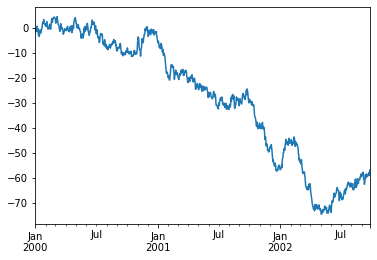

In [101]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [102]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])

In [103]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

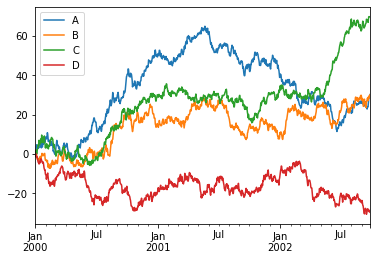

In [104]:
plt.figure(); df.plot(); plt.legend(loc='best')

 <h2>6. Getting Data In/Out

<h3>CSV

*Reading from a csv file by df.to_csv(filename)*

<h2>1. Grouping and aggregating

By “group by” we are referring to a process involving one or more of the following steps:
 - Splitting the data into groups based on some criteria
 - Applying a function to each group independently
 - Combining the results into a data structure

Of these, the split step is the most straightforward. In fact, in many situations you may wish to split the data set intogroups and do something with those groups yourself. In the apply step, we might wish to e.g. compute a summarystatistic (or statistics) about each group, such as group sums, means or counts.

Since the set of object instance method on pandas data structures are generally rich and expressive, we often simplywant to invoke, say, a DataFrame function on each group.

See the cookbook for some advanced strategies

<h3>Splitting an object into groups:

Pandas objects can be split on any of their axes. The abstract definition of grouping is to provide a mapping of labelsto group names. To create a GroupBy object (more on what the GroupBy object is later), you do the following:

 - grouped = obj.groupby(key) <br>
 - grouped = obj.groupby(key, axis=1) <br>
 - grouped = obj.groupby([key1, key2]) <br>

The mapping can be specified many different ways, but for DataFrame objects you can use a string indicating acolumn to be used to group, for example: df.groupby('A'). This is just syntactic sugar for df.groupby(df['A']),but it makes life simpler

Collectively we refer to the grouping objects as the keys. For example, consider the following DataFrame:

In [105]:
from numpy.random import randn
df=pd.DataFrame({'A':['foo','bar','foo','bar', 'foo', 'bar','foo','foo'], 'B':['one','one','two', 'three', 'two','two','one','three'], 'C':randn(8),'D':randn(8)})

In [106]:
df

,A,B,C,D
0,foo,one,0.330229,0.473515
1,bar,one,-0.818068,-1.136728
2,foo,two,-0.523651,-2.518818
3,bar,three,0.459592,-0.857527
4,foo,two,-2.306496,0.048594
5,bar,two,-0.176423,-0.418319
6,foo,one,0.843643,1.147227
7,foo,three,-0.078786,-1.739754


In [107]:
grouped=df.groupby('A')

In [108]:
grouped=df.groupby(['A','B'])

These will split the DataFrame on its index (rows). We could also split by the columns by using a function (try it!):

In [109]:
def get_letter_type(letter):
    if letter.lower()in'aeiou':
        return 'vowel'
    else:
        return 'consonant'

In [110]:
grouped=df.groupby(get_letter_type,axis=1)

In [111]:
for name, group in grouped:
    print(name, group)

consonant        B         C         D
0    one  0.330229  0.473515
1    one -0.818068 -1.136728
2    two -0.523651 -2.518818
3  three  0.459592 -0.857527
4    two -2.306496  0.048594
5    two -0.176423 -0.418319
6    one  0.843643  1.147227
7  three -0.078786 -1.739754
vowel      A
0  foo
1  bar
2  foo
3  bar
4  foo
5  bar
6  foo
7  foo


Starting with 0.8, pandas Index objects now supports duplicate values. If a non-unique index is used as the group keyin a groupby operation, all values for the same index value will be considered to be in one group and thus the output of aggregation functions will only contain unique index values:

In [112]:
lst=[1,2,3,1,2,3]

In [113]:
s=pd.Series([1,2,3,10,20,30],lst)

In [114]:
grouped=s.groupby(level=0)

In [115]:
grouped.first()

1    1
2    2
3    3
dtype: int64

In [116]:
grouped.last()

1    10
2    20
3    30
dtype: int64

In [117]:
grouped.sum()

1    11
2    22
3    33
dtype: int64

Note that no splitting occurs until it’s needed. Creating the GroupBy object only verifies that you’ve passed a validmapping.

Note: Many kinds of complicated data manipulations can be expressed in terms of GroupBy operations (though can’tbe guaranteed to be the most efficient). You can get quite creative with the label mapping functions.

<h3>Aggregation

Once the GroupBy object has been created, several methods are available to perform a computation on the groupeddata.

An obvious one is aggregation via the 'aggregate' or equivalently 'agg' method:

In [118]:
grouped=df.groupby('A')

In [119]:
grouped.aggregate(np.sum)

,C,D
A,,
bar,-0.534899,-2.412574
foo,-1.735061,-2.589235


In [120]:
grouped = df.groupby(['A', 'B'])

In [121]:
grouped.aggregate(np.sum)

C         D
A   B                        
bar one   -0.818068 -1.136728
    three  0.459592 -0.857527
    two   -0.176423 -0.418319
foo one    1.173872  1.620743
    three -0.078786 -1.739754
    two   -2.830147 -2.470224

As you can see, <mark style=background-color:yellow>the result of</mark> the aggregation will have the group names as the new index along the grouped axis. In the case of multiple keys, the result is a MultiIndex by default, though this can be changed by using the `as_index` option:

In [122]:
grouped = df.groupby(['A', 'B'], as_index=False)

In [123]:
grouped.aggregate(np.sum)

,A,B,C,D
0,bar,one,-0.818068,-1.136728
1,bar,three,0.459592,-0.857527
2,bar,two,-0.176423,-0.418319
3,foo,one,1.173872,1.620743
4,foo,three,-0.078786,-1.739754
5,foo,two,-2.830147,-2.470224


In [124]:
df.groupby('A', as_index=False).sum()

,A,C,D
0,bar,-0.534899,-2.412574
1,foo,-1.735061,-2.589235


Another simple aggregation example is to compute the size of each group. This is included in GroupBy as the `size`
method. It returns a Series whose index are the group names and whose values are the sizes of each group.

In [125]:
grouped.size()

,A,B,size
0,bar,one,1
1,bar,three,1
2,bar,two,1
3,foo,one,2
4,foo,three,1
5,foo,two,2


In [126]:
grouped.describe()

C                                                                        \
  count      mean       std       min       25%       50%       75%       max   
0   1.0 -0.818068       NaN -0.818068 -0.818068 -0.818068 -0.818068 -0.818068   
1   1.0  0.459592       NaN  0.459592  0.459592  0.459592  0.459592  0.459592   
2   1.0 -0.176423       NaN -0.176423 -0.176423 -0.176423 -0.176423 -0.176423   
3   2.0  0.586936  0.363038  0.330229  0.458583  0.586936  0.715289  0.843643   
4   1.0 -0.078786       NaN -0.078786 -0.078786 -0.078786 -0.078786 -0.078786   
5   2.0 -1.415073  1.260662 -2.306496 -1.860784 -1.415073 -0.969362 -0.523651   

      D                                                                        
  count      mean       std       min       25%       50%       75%       max  
0   1.0 -1.136728       NaN -1.136728 -1.136728 -1.136728 -1.136728 -1.136728  
1   1.0 -0.857527       NaN -0.857527 -0.857527 -0.857527 -0.857527 -0.857527  
2   1.0 -0.418319       NaN -0.418319 -0.418319 -0.418319 -0.418319 -0.418319  
3   2.0  0.810371  0.476386  0.473515  0.641943  0.810371  0.978799  1.147227  
4   1.0 -1.739754       NaN -1.739754 -1.739754 -1.739754 -1.739754 -1.739754  
5   2.0 -1.235112  1.815434 -2.518818 -1.876965 -1.235112 -0.593259  0.048594

**Note: Aggregating functions are ones that reduce the dimension of the returned objects, for example:** *mean, sum,
size, count, std, var, sem, describe, first, last, nth, min, max.*    
**This is what happens when you dofor example** *DataFrame.sum()* **and get back a** *Series*.

<h2>Exercise

Write a function createFrame() that takes in input two positive integers n and m and returns a
pandas DataFrame object with n rows and m columns, containing random integers in the
range 0, ..., ceil(n/10) (both endpoints included). Use it to create a DataFrame with 1000 rows
and 2 columns, group it by values of the first column and compute the sum, average, min, max,
and standard deviation.

<H2>2. Working with missing data

In this section, we will discuss missing (also referred to as NA) values in pandas.
See the <font color = blue>cookbook</font> for some advanced strategies

<H3>Missing data basics

<H4>When / why does data become missing?

Some might quibble over our usage of missing. By “missing” we simply mean **null** or “not present for whatever reason”.
Many data sets simply arrive with missing data, either because it exists and was not collected or it never existed. 
For example, in a collection of financial time series, some of the time series might start on different dates.
Thus, values prior to the start date would generally be marked as missing.

In pandas, one of the most common ways that missing data is **introduced** into a data set is by reindexing. For
example

In [127]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'],columns=['one', 'two', 'three'])

In [128]:
df['four'] = 'bar'

In [129]:
df['five'] = df['one'] > 0

In [130]:
df

,one,two,three,four,five
a,1.284314,0.764734,-0.523101,bar,True
c,0.676765,-0.296109,-0.010972,bar,True
e,1.016060,2.495801,0.766941,bar,True
f,-0.522151,0.244645,0.108331,bar,False
h,-0.794481,0.380971,1.088916,bar,False


In [131]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])

In [132]:
df2

,one,two,three,four,five
a,1.284314,0.764734,-0.523101,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,0.676765,-0.296109,-0.010972,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,1.016060,2.495801,0.766941,bar,True
f,-0.522151,0.244645,0.108331,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,-0.794481,0.380971,1.088916,bar,False


<H4>Values considered “missing”

As data comes in many shapes and forms, pandas aims to be flexible with regard to handling missing data. While `NaN`
is the default missing value marker for reasons of computational speed and convenience, we need to be able to easily
detect this value with data of different types: floating point, integer, boolean, and general object. In many cases,
however, the Python `None` will arise and we wish to also consider that “missing” or “null”.

To make detecting missing values easier (and across different array dtypes), pandas provides the `isnull()` and
`notnull()` functions, which are also methods on `Series` objects:

In [133]:
df2['one']

a    1.284314
b         NaN
c    0.676765
d         NaN
e    1.016060
f   -0.522151
g         NaN
h   -0.794481
Name: one, dtype: float64

In [134]:
pd.isnull(df2['one'])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [135]:
df2['four'].notnull()

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: four, dtype: bool

**Summary**: `NaN` and `None` (in object arrays) are considered missing by the `isnull` and `notnull` functions. `inf` and `-inf` are no longer considered missing by default.


<H3>Inserting missing data

You can insert missing values by simply assigning to containers. The actual missing value used will be chosen based
on the dtype.

For example, numeric containers will always use `NaN` regardless of the missing value type chosen:

In [136]:
s = pd.Series([1, 2, 3])

In [137]:
s.loc[0] = None

In [138]:
s

0    NaN
1    2.0
2    3.0
dtype: float64

Likewise, datetime containers will always use `NaT`.

For object containers, pandas will use the value given:

In [139]:
s = pd.Series(["a", "b", "c"])

In [140]:
s.loc[0] = None

In [141]:
s.loc[1] = np.nan

In [142]:
s

0    None
1     NaN
2       c
dtype: object


<H3>Calculations with missing data

Missing values propagate naturally through arithmetic operations between pandas objects.

In [143]:
a = pd.DataFrame(np.random.randn(5, 2), index=['a', 'c', 'e', 'f', 'h'],columns=['one', 'two'])
a.loc['a','one'] = np.nan
a.loc['c','one'] = np.nan
a

,one,two
a,NaN,-0.550742
c,NaN,-1.187885
e,0.138905,0.405909
f,-1.511583,-0.769587
h,1.344751,-0.100106


In [144]:
b = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'],columns=['one', 'two','three'])
b.loc['a','one'] = np.nan
b.loc['c','one'] = np.nan
b.loc['h','one'] = np.nan
b

,one,two,three
a,NaN,0.030239,-1.540796
c,NaN,0.279311,-0.576155
e,-0.642767,-0.212547,1.119728
f,0.432215,0.276943,-0.618152
h,NaN,-0.410660,-0.151172


In [145]:
a + b

,one,three,two
a,NaN,NaN,-0.520503
c,NaN,NaN,-0.908574
e,-0.503862,NaN,0.193363
f,-1.079368,NaN,-0.492644
h,NaN,NaN,-0.510766



The descriptive statistics and computational methods are all written to account for missing data. For example:
+ When summing data, NA (missing) values will be treated as zero
+ If the data are all NA, the result will be NA
+ Methods like **cumsum** and **cumprod** ignore NA values, but preserve them in the resulting arrays

In [146]:
df = b
df

,one,two,three
a,NaN,0.030239,-1.540796
c,NaN,0.279311,-0.576155
e,-0.642767,-0.212547,1.119728
f,0.432215,0.276943,-0.618152
h,NaN,-0.410660,-0.151172


In [147]:
df['one'].sum()

-0.21055227391667003

In [148]:
df.mean(1)

a   -0.755278
c   -0.148422
e    0.088138
f    0.030335
h   -0.280916
dtype: float64

In [149]:
df.cumsum()

,one,two,three
a,NaN,0.030239,-1.540796
c,NaN,0.309550,-2.116951
e,-0.642767,0.097004,-0.997223
f,-0.210552,0.373947,-1.615375
h,NaN,-0.036714,-1.766547



<H4>NA values in GroupBy

NA groups in GroupBy are automatically excluded. This behavior is consistent with R, for example.


<H3>Cleaning / filling missing dat

pandas objects are equipped with various data manipulation methods for dealing with missing data.

<H4>Filling missing values: fillna

The **fillna** function can “fill in” NA values with non-null data in a couple of ways, which we illustrate:

**Replace NAwith a scalar value**

In [150]:
df2 = df
df2['four'] = 'bar'
df2['five'] = b['two'] > 0
df2['six'] = pd.datetime.now().date()
df2

/var/folders/w7/ntqh397j7r1g34xm7y1cnzn40000gn/T/ipykernel_4699/1040584068.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df2['six'] = pd.datetime.now().date()


,one,two,three,four,five,six
a,NaN,0.030239,-1.540796,bar,True,2022-09-23
c,NaN,0.279311,-0.576155,bar,True,2022-09-23
e,-0.642767,-0.212547,1.119728,bar,False,2022-09-23
f,0.432215,0.276943,-0.618152,bar,True,2022-09-23
h,NaN,-0.410660,-0.151172,bar,False,2022-09-23


In [151]:
df2.fillna(0)

,one,two,three,four,five,six
a,0.000000,0.030239,-1.540796,bar,True,2022-09-23
c,0.000000,0.279311,-0.576155,bar,True,2022-09-23
e,-0.642767,-0.212547,1.119728,bar,False,2022-09-23
f,0.432215,0.276943,-0.618152,bar,True,2022-09-23
h,0.000000,-0.410660,-0.151172,bar,False,2022-09-23


In [152]:
df2['four'].fillna('missing')

a    bar
c    bar
e    bar
f    bar
h    bar
Name: four, dtype: object

<H4>Fill gaps forward or backward

Using the same filling arguments as <font color = blue>*reindexing*</font>, we can propagate non-null values forward or backward:

In [153]:
df

,one,two,three,four,five,six
a,NaN,0.030239,-1.540796,bar,True,2022-09-23
c,NaN,0.279311,-0.576155,bar,True,2022-09-23
e,-0.642767,-0.212547,1.119728,bar,False,2022-09-23
f,0.432215,0.276943,-0.618152,bar,True,2022-09-23
h,NaN,-0.410660,-0.151172,bar,False,2022-09-23


In [154]:
df.fillna(method='pad')

,one,two,three,four,five,six
a,NaN,0.030239,-1.540796,bar,True,2022-09-23
c,NaN,0.279311,-0.576155,bar,True,2022-09-23
e,-0.642767,-0.212547,1.119728,bar,False,2022-09-23
f,0.432215,0.276943,-0.618152,bar,True,2022-09-23
h,0.432215,-0.410660,-0.151172,bar,False,2022-09-23


To remind you, these are the available filling methods:

|  **Method** | **Action**  |
|  :----  | :----:  |
|  pad / ffill  |   Fill values forward |
| bfill / backfill  |    Fill values backward  |

With time series data, using pad/ffill is extremely common so that the “last known value” is available at every time
point.

The `ffill()` function is equivalent to `fillna(method='ffill')` and `bfill()` is equivalent to `fillna(method='bfill')`


<H4>Dropping axis labels with missing data: dropna

You may wish to simply exclude labels from a data set which refer to missing data. To do this, use the **dropna**
method:

In [155]:
df

,one,two,three,four,five,six
a,NaN,0.030239,-1.540796,bar,True,2022-09-23
c,NaN,0.279311,-0.576155,bar,True,2022-09-23
e,-0.642767,-0.212547,1.119728,bar,False,2022-09-23
f,0.432215,0.276943,-0.618152,bar,True,2022-09-23
h,NaN,-0.410660,-0.151172,bar,False,2022-09-23


In [156]:
df.dropna(axis=0)

,one,two,three,four,five,six
e,-0.642767,-0.212547,1.119728,bar,False,2022-09-23
f,0.432215,0.276943,-0.618152,bar,True,2022-09-23


In [157]:
df.dropna(axis=1)

,two,three,four,five,six
a,0.030239,-1.540796,bar,True,2022-09-23
c,0.279311,-0.576155,bar,True,2022-09-23
e,-0.212547,1.119728,bar,False,2022-09-23
f,0.276943,-0.618152,bar,True,2022-09-23
h,-0.410660,-0.151172,bar,False,2022-09-23


In [158]:
df['one'].dropna()

e   -0.642767
f    0.432215
Name: one, dtype: float64

Series.dropna is a simpler method as it only has one axis to consider. DataFrame.dropna has considerably more
options than Series.dropna, which can be examined in the API.